In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

#Initialization
#Load Data
data = scipy.io.loadmat('powerTrainData.mat')

#Modify I/O
xtr = np.transpose(data.get('powerTrainInput'))
ytr = np.ravel(data.get('powerTrainOutput'))
xte = np.transpose(data.get('powerTestInput'))

#Create array for models
compModel = []
modelScore = []


In [2]:
# Standardization
standardScaler = StandardScaler()
xtr = standardScaler.fit_transform(xtr)
xte = standardScaler.fit_transform(xte)


In [3]:
#Regression
reg = LinearRegression()
compModel.append(cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error'))
modelScore.append((cross_val_score(reg,xtr,ytr, cv=5, scoring='r2')).mean())
reg.fit(xtr, ytr);

In [4]:
#Ridge Cross-Validation Regression
alphasLs = np.linspace(0.125,50,400)

reg = RidgeCV(alphas=alphasLs, cv=5)
compModel.append(cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error'))
modelScore.append((cross_val_score(reg,xtr,ytr, cv=5, scoring='r2')).mean())
reg.fit(xtr, ytr)

print("Best alpha on index: %.3f" % reg.alpha_)
ypred = reg.predict(xte)
with open('linear-model-result.csv', 'w') as f:
    for i in ypred:
        f.write("%.2f\n" % i)


Best alpha on index: 0.375


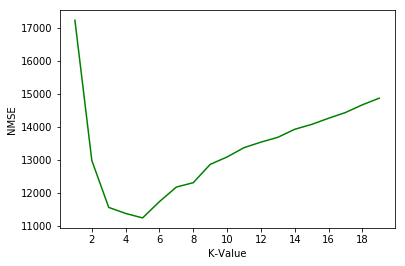

In [5]:
#KNN Regression
k_ = range(1,20)
results = []

#Labels
plt.xlabel('K-Value')
plt.ylabel('NMSE')

#Test various Ks
for n in k_ : 
    reg = KNeighborsRegressor(n)
    score = cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error')
    results.append(abs(score.mean()))

#Plot the results of the different Ks
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(k_,results, color="green")

#Choose the best K 
k_opt = 5

#Append data to the array for comparison
#Train with best K
reg = KNeighborsRegressor(n_neighbors=k_opt)
compModel.append(cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error'))
modelScore.append((cross_val_score(reg,xtr,ytr, cv=5, scoring='r2')).mean())
reg.fit(xtr, ytr);
ypred = reg.predict(xte)
with open('knn-model-result.csv', 'w') as f:
    for i in ypred:
        f.write("%.2f\n" % i)

2 vs 3 was False
2 vs 4 was False
2 vs 5 was False
2 vs 6 was False
2 vs 7 was False
2 vs 8 was False
2 vs 9 was False
2 vs 10 was True
2 vs 11 was True
2 vs 12 was True
3 vs 4 was True
3 vs 5 was True
3 vs 6 was True
3 vs 7 was True
3 vs 8 was True
3 vs 9 was True
3 vs 10 was True
3 vs 11 was True
3 vs 12 was True
4 vs 5 was False
4 vs 6 was False
4 vs 7 was False
4 vs 8 was False
4 vs 9 was False
4 vs 10 was True
4 vs 11 was True
4 vs 12 was False
5 vs 6 was False
5 vs 7 was False
5 vs 8 was False
5 vs 9 was False
5 vs 10 was True
5 vs 11 was True
5 vs 12 was False
6 vs 7 was False
6 vs 8 was False
6 vs 9 was False
6 vs 10 was True
6 vs 11 was True
6 vs 12 was False
7 vs 8 was False
7 vs 9 was False
7 vs 10 was False
7 vs 11 was False
7 vs 12 was False
8 vs 9 was False
8 vs 10 was False
8 vs 11 was False
8 vs 12 was False
9 vs 10 was False
9 vs 11 was False
9 vs 12 was False
10 vs 11 was False
10 vs 12 was False
11 vs 12 was False
Best Number Of Nodes: 10


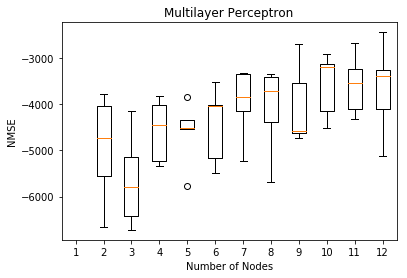

In [6]:
#MLP IN PROGRESS
no_nodes = range(2,13)
results = []
results.append([])
for n in no_nodes :
    reg = MLPRegressor(hidden_layer_sizes=(n,),solver='lbfgs', random_state=0)
    score = cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error')
    results.append(score)

# Signifance test 95% confidence
for i in range(1,12):
    for j in range(i+1,12):
        devAB = (np.std(results[i])**2 + np.std(results[j])**2)**(1/2)
        print("%0.f vs %0.f was %s" %(i+1, j+1, abs(results[i].mean()-results[j].mean()) > 1.96* devAB / (5**(1/2))))

#Choose the best K according to graph
nodes_opt = 10
print("Best Number Of Nodes: %.0f" % nodes_opt)

#Plot the graph of the different K's
plt.ylabel('NMSE')
plt.xlabel('Number of Nodes')
plt.title('Multilayer Perceptron')
plt.boxplot(results)

reg = MLPRegressor(hidden_layer_sizes=(nodes_opt,), solver='lbfgs',random_state = 0)
compModel.append(cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error'))
modelScore.append((cross_val_score(reg,xtr,ytr, cv=5, scoring='r2')).mean())
reg.fit(xtr, ytr);
ypred = reg.predict(xte)
with open('mlp-result.csv', 'w') as f:
    for i in ypred:
        f.write("%.2f\n" % i)

In [15]:
#MLP COMMITTEEE using weighted averaging
reg = BaggingRegressor(base_estimator=MLPRegressor(hidden_layer_sizes=(nodes_opt,),solver='lbfgs'), max_samples=675, random_state = 1)
compModel.append(cross_val_score(reg,xtr,ytr, cv=5, scoring='neg_mean_squared_error'))
modelScore.append((cross_val_score(reg,xtr,ytr, cv=5, scoring='r2')).mean())
reg.fit(xtr, ytr);


In [12]:
#Write to File
ypred = reg.predict(xte)
with open('mlp-committee-result.csv', 'w') as f:
    for i in ypred:
        f.write("%.2f\n" % i)

[0.9770734027415855, 0.9770573920222942, 0.9594352114279527, 0.9872932331558498, 0.9869945471759584, 0.9869945471759584]
1 vs 2 was False
1 vs 3 was True
1 vs 4 was True
1 vs 5 was True
2 vs 3 was True
2 vs 4 was True
2 vs 5 was True
3 vs 4 was True
3 vs 5 was True
4 vs 5 was False


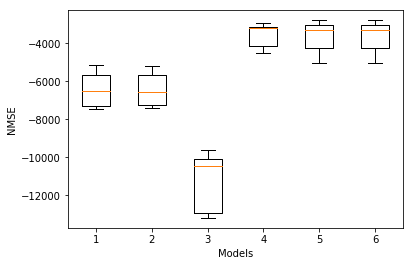

In [13]:
#Plotting and Scoring

#Labels
plt.xlabel('Models')
plt.ylabel('NMSE')

#Plots
plt.boxplot(compModel);
print(modelScore)


#2.5758 for 99% confidence
# Signifance test 95% confidence
for i in range(0,4):
    for j in range(i+1,5):
        devAB = (np.std(compModel[i])**2 + np.std(compModel[j])**2)**(1/2)
        print("%0.f vs %0.f was %s" %(i+1, j+1, abs(compModel[i].mean()-compModel[j].mean()) > 1.96* devAB / (5**(1/2))))
